In [15]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

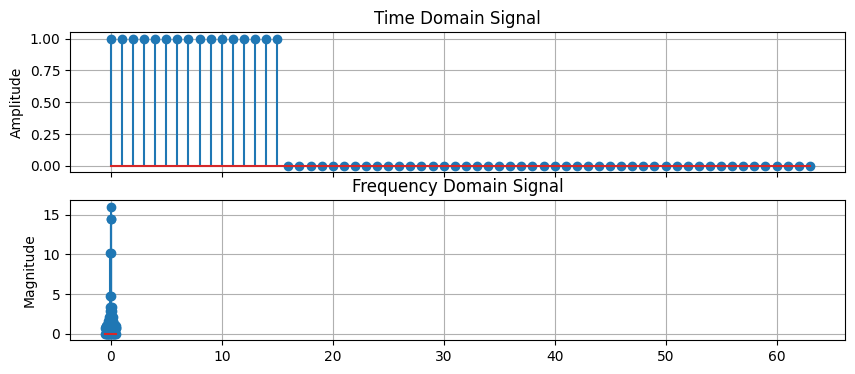

In [23]:
N = 64
t = np.arange(N)
st = np.concatenate((np.ones(N * 1 // 4), np.zeros(N * 3 // 4)))
f = np.fft.fftshift(np.fft.fftfreq(N))  # d=1 means Ts=1
Sf = fft.fftshift(fft.fft(st))

fig, axs = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

axs[0].stem(t, st)
axs[0].set_title("Time Domain Signal")
axs[0].set_ylabel("Amplitude")
axs[0].grid()

axs[1].stem(f, np.abs(Sf))
axs[1].set_title("Frequency Domain Signal")
axs[1].set_ylabel("Magnitude")
axs[1].grid()

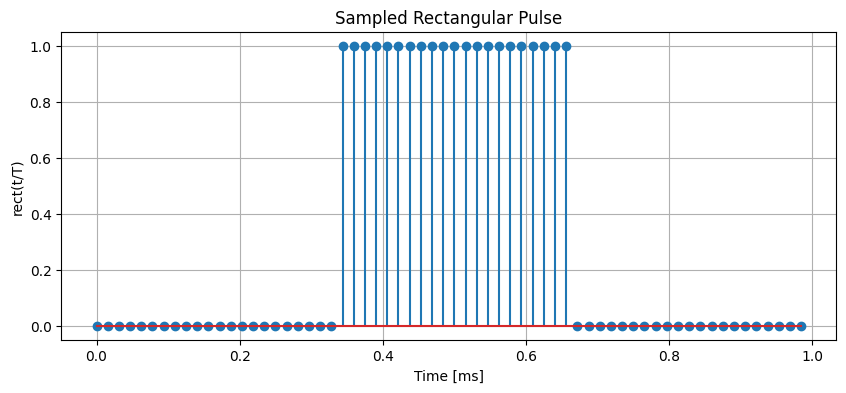

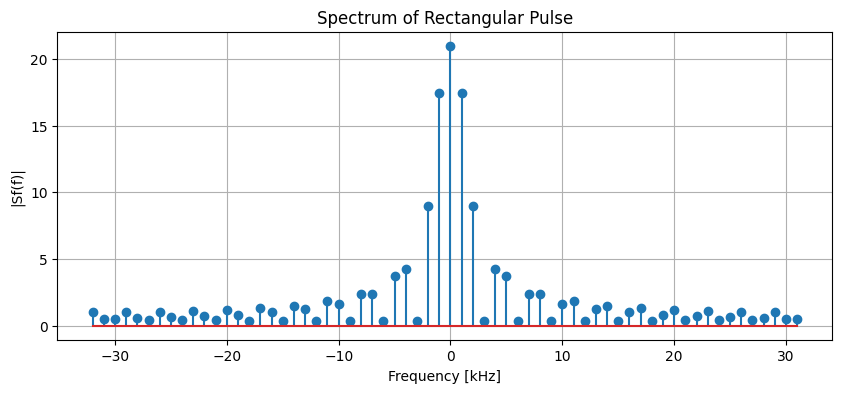

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 32e-5  # pulse width in seconds (example: 12 ms)
fs = 64e3  # sampling frequency in Hz
N = 64  # total number of samples

Ts = 1 / fs
t = np.arange(N) * Ts  # time axis in seconds

st = np.where(np.abs(t - (N * Ts) / 2) < T / 2, 1.0, 0.0)

Sf = np.fft.fftshift(np.fft.fft(st))

# frequency vector in Hz
f = np.fft.fftshift(np.fft.fftfreq(N, Ts))

# Time-domain pulse
plt.figure(figsize=(10, 4))
plt.stem(t * 1e3, st)  # scale time to ms
plt.xlabel("Time [ms]")
plt.ylabel("rect(t/T)")
plt.title("Sampled Rectangular Pulse")
plt.grid()
plt.show()

# Frequency-domain magnitude
plt.figure(figsize=(10, 4))
plt.stem(f / 1e3, np.abs(Sf))  # scale f to kHz
plt.xlabel("Frequency [kHz]")
plt.ylabel("|Sf(f)|")
plt.title("Spectrum of Rectangular Pulse")
plt.grid()
plt.show()

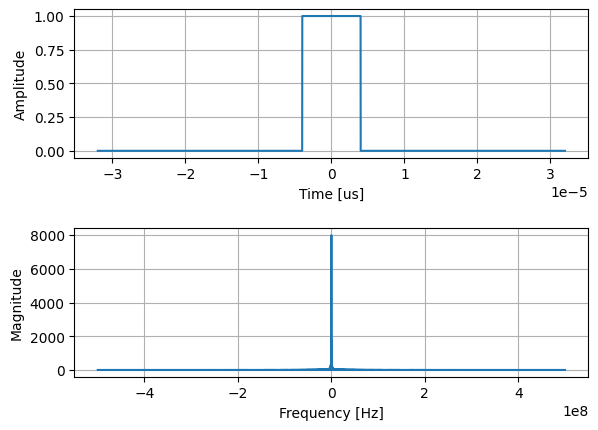

In [187]:
T = 8e-6  # Pulse Width [s]
fs = 1e9  # Sampling Frequency [Hz]
Ts = 1 / fs  # Sampling period [s]

t = np.arange(-4 * T, 4 * T, Ts)  # Time vector
st = np.where(np.abs(t) < T / 2, 1.0, 0.0)  # Signal in time domain

Sf = np.fft.fftshift(np.fft.fft(st))  # Signal in frequency domain
f = np.fft.fftshift(np.fft.fftfreq(len(t), Ts))  # Frequency vector

fig, axs = plt.subplots(2, 1)
fig.tight_layout(pad=3.0)
axs = axs.flatten()

axs[0].plot(t, st)  # Time in us
axs[0].set_xlabel("Time [us]")
axs[0].set_ylabel("Amplitude")
axs[0].grid()

axs[1].plot(f, np.abs(Sf))  # Frequency in kHz
axs[1].set_xlabel("Frequency [Hz]")
axs[1].set_ylabel("Magnitude")
axs[1].grid()

plt.show()

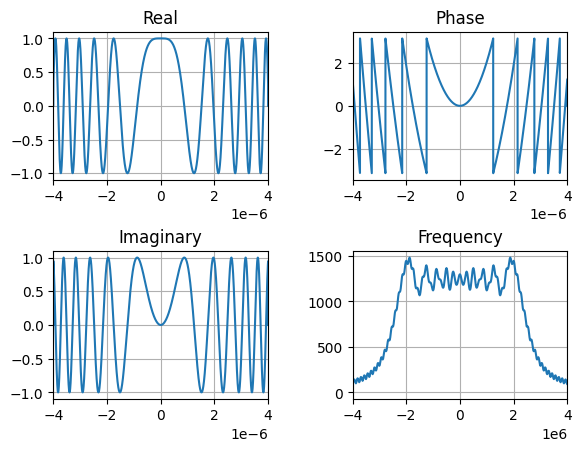

In [210]:
K = 65e10
st_fm = st * np.exp(1j * np.pi * K * t**2)  # FM signal in time
Sf_fm = np.fft.fftshift(np.fft.fft(st_fm))

fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=3.0)
axs = axs.flatten()

axs[0].set_title("Real")
axs[0].plot(t, np.real(st_fm))
axs[0].set_xlim(-4e-6, 4e-6)


axs[1].set_title("Phase")
axs[1].plot(t, np.angle(st_fm))
axs[1].set_xlim(-4e-6, 4e-6)

axs[2].set_title("Imaginary")
axs[2].plot(t, np.imag(st_fm))
axs[2].set_xlim(-4e-6, 4e-6)

axs[3].set_title("Frequency")
axs[3].plot(f, np.abs(Sf_fm))
axs[3].set_xlim(-4e6, 4e6)

for ax in axs:
    ax.grid()

plt.show()

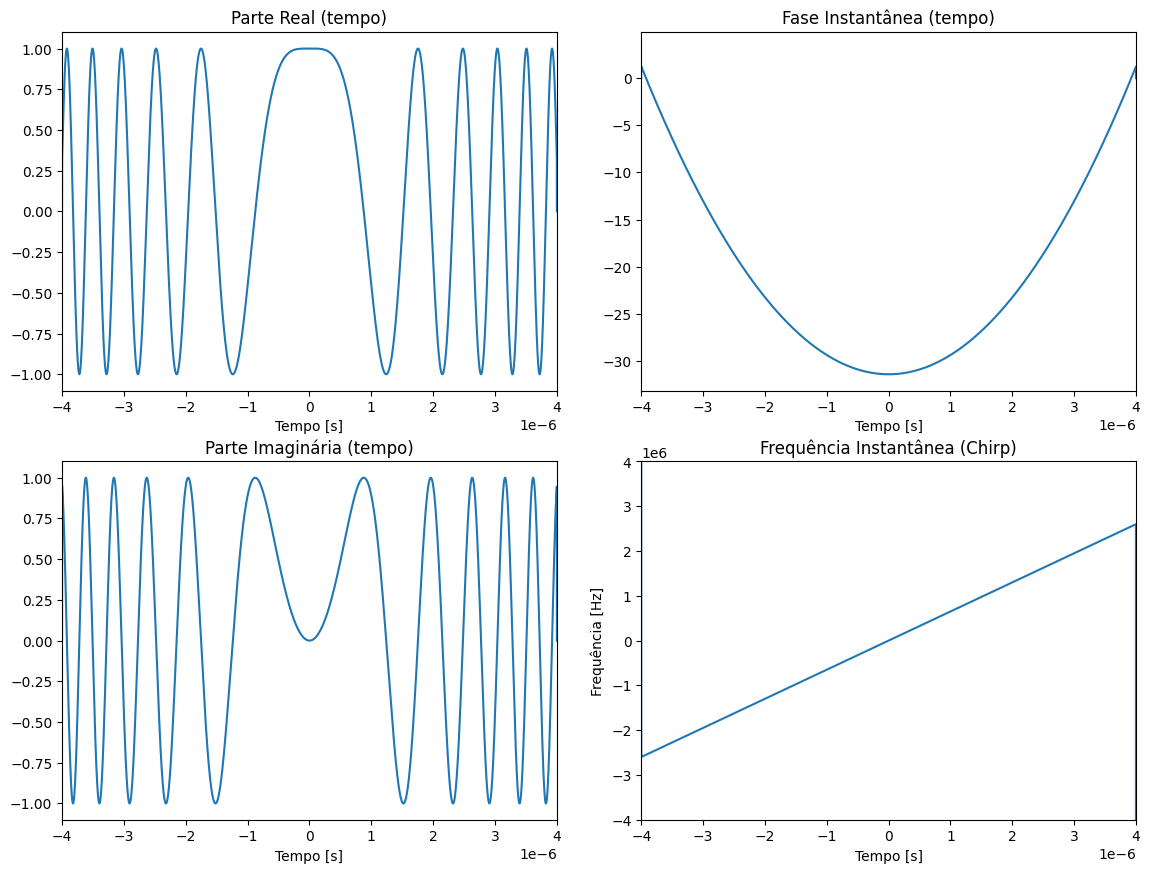

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

# ---------------------------
# Parâmetros do sinal
# ---------------------------
T = 8e-6  # largura do pulso (s)
K = 65e10  # taxa de chirp (Hz/s)
fs = 1e9  # frequência de amostragem (Hz)
Ts = 1 / fs  # período de amostragem

# Eixo temporal (8T para enxergar melhor a janela)
t = np.arange(-4 * T, 4 * T, Ts)

# ---------------------------
# Sinal no tempo (chirp retangular)
# ---------------------------
rect = np.where(np.abs(t) <= T / 2, 1.0, 0.0)  # janela retangular
s_t = rect * np.exp(1j * np.pi * K * t**2)

# ---------------------------
# FFT e eixo de frequência
# ---------------------------
Sf = np.fft.fftshift(np.fft.fft(s_t))
f = np.fft.fftshift(np.fft.fftfreq(len(t), Ts))

# ---------------------------
# Frequência instantânea
# ---------------------------
phi = np.unwrap(np.angle(s_t))  # fase contínua
f_inst = np.gradient(phi, Ts) / (2 * np.pi)  # Hz

# ---------------------------
# Plots
# ---------------------------
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
fig.tight_layout(pad=3.0)
axs = axs.flatten()

# Parte real
axs[0].plot(t, np.real(s_t))
axs[0].set_title("Parte Real (tempo)")
axs[0].set_xlim(-4e-6, 4e-6)
axs[0].set_xlabel("Tempo [s]")


# Fase no tempo
axs[1].plot(t, phi)
axs[1].set_title("Fase Instantânea (tempo)")
axs[1].set_xlim(-4e-6, 4e-6)
axs[1].set_xlabel("Tempo [s]")

# Parte imaginária
axs[2].plot(t, np.imag(s_t))
axs[2].set_title("Parte Imaginária (tempo)")
axs[2].set_xlim(-4e-6, 4e-6)
axs[2].set_xlabel("Tempo [s]")


# Frequência instantânea
axs[3].plot(t, f_inst)
axs[3].set_title("Frequência Instantânea (Chirp)")
axs[3].set_xlim(-4e-6, 4e-6)
axs[3].set_ylim(-4e6, 4e6)
axs[3].set_xlabel("Tempo [s]")
axs[3].set_ylabel("Frequência [Hz]")

plt.show()